# SD210:

## Introduction à l'apprentissage profond ("Deep Learning")

Auteur : Alexandre Gramfort

Programme:

  - Perceptron multi-couches / Multi-Layer Perceptron (MLP) avec scikit-learn (http://scikit-learn.org/)
  - MLP avec TensorFlow (http://www.tensorflow.org) et Keras (https://keras.io/)
  - Réseaux de neurones convolutionnels / Convolutional Neural Network (CNN)
  
Avant de commencer merci de vérifier que vous avez tout bien installé en exécutant la cellule suivante:

In [3]:
%matplotlib inline                      

import numpy as np                      # charge un package pour le numérique
import matplotlib.pyplot as plt         # charge un package pour les graphiques

import sklearn  # scikit-learn
import tensorflow as tf
import keras

Using TensorFlow backend.


# 0 - Multi-layer Perceptron dans le navigateur

Explorer : http://playground.tensorflow.org

Questions:

- Le dataset "2 cercles" est-il séparable avec 0 couche cachée (Hidden layer)?
- Le dataset "2 blobs" est-il séparable avec 0 couche cachée (Hidden layer)?
- Quel est le nombre minimum de couches cachées nécessaire pour les 2 cercles?

Nous allons maintenant utiliser le dataset "circles" de scikit-learn et programmer notre propre MLP:

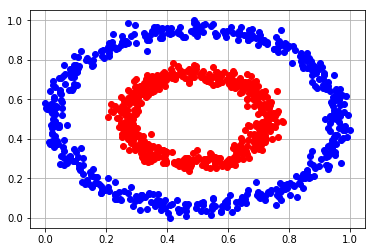

In [4]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

X, y = datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)
X = MinMaxScaler().fit_transform(X)

plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro')
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo')
plt.grid('on')

Nous allons désormais utiliser la function suivante:

In [5]:
def plot_decision_function(clf=None, X=X, y=y):
    if clf is not None:
        # create a mesh to plot in
        h = .02  # step size in the mesh
        offset = 0.1
        x_min, x_max = X[:, 0].min() - offset, X[:, 0].max() + offset
        y_min, y_max = X[:, 1].min() - offset, X[:, 1].max() + offset
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        if Z.ndim == 2:
            Z = np.argmax(Z, axis=1)
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.plot(X[y == 1, 0], X[y == 1, 1], 'yo')
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'ko')

    plt.title("Decision surface")
    plt.axis('tight')

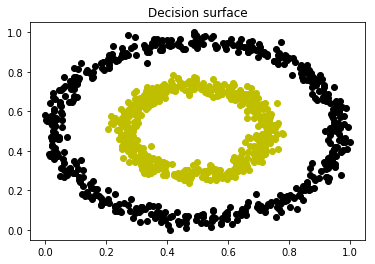

In [6]:
plot_decision_function()

# 1 - Multi-Layer Perceptron avec scikit-learn

Le MLP est implémenté dans scikit-learn dans le module `sklearn.neural_network` avec les estimateurs `MLPClassifier` et `MLPRegressor`.

Nous allons utiliser `MLPClassifier` sur les datasets "circles" et "blobs" de scikit-learn.

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

max_iter = 1000

hidden_layer_sizes = (4, 2)
learning_rate_init = 0.05
solver = 'sgd'
solver = 'adam'

mlp = MLPClassifier(solver=solver, learning_rate='constant',
                    hidden_layer_sizes=hidden_layer_sizes,
                    learning_rate_init=learning_rate_init,
                    max_iter=max_iter, activation='tanh',
                    verbose=0, random_state=0)
mlp.fit(X, y)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 2), learning_rate='constant',
       learning_rate_init=0.05, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=0,
       warm_start=False)

In [8]:
len(mlp.loss_curve_)

113

Training set score: 1.000000
Training set loss: 0.004521


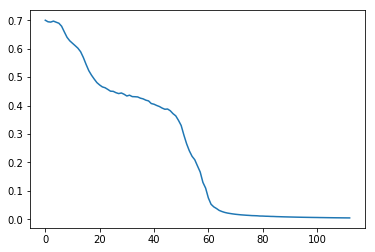

In [9]:
print("Training set score: %f" % mlp.score(X, y))
print("Training set loss: %f" % mlp.loss_)

plt.plot(mlp.loss_curve_);

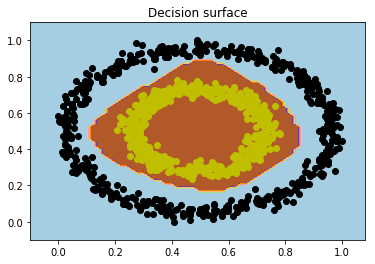

In [10]:
plot_decision_function(clf=mlp)

## Questions:

  - Le résultat est-il acceptable?
  - Peut-on améliorer la performance en utilisant plus de couches ou des couches plus grosses?
  - Changer l'algorithme d'optimisation de 'sgd' à 'adam' aide-t-il?

# 2 - Multi-Layer Perceptron avec Tensorflow

## Introduction à TensorFlow

TensorFlow est un système de calcul basé sur des graphes exprimés de façon symbolique.
Cele permet d'utiliser de la différenciation automatique et d'apprendre les paramètres par des méthodes de type descente de gradient.

- https://www.tensorflow.org 

Objets dans TensorFlow:
- **constant:** tenseurs constant, tels que le learning rate
- **Variables:** n'importe quel tenseur, tels que les parametètres des modèles
- **Placeholders:** placeholders pour les entrées et les sorties des modèles
- et beaucoup d'autres (functions, loss, ...)

Le graphe est symbolique. Aucun calcul est effectué jusqu'à qu'une `Session` soit définie et lancée avec `run` ou `eval`. TensorFlow peut effectuer le calcul sur (plusieurs) CPUs ou GPUs.

In [11]:
import tensorflow as tf

a = tf.constant(3)
b = tf.constant(2)
c = a + b

In [12]:
print(type(a))
print(a)

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("Const:0", shape=(), dtype=int32)


In [13]:
print(type(c))
print(c)

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("add:0", shape=(), dtype=int32)


In [14]:
with tf.Session() as sess:
    c_value = sess.run(c)
    
print(type(c_value))
print(c_value)

<class 'numpy.int32'>
5


In [15]:
d = tf.Variable(0)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(d))

    sess.run(d.assign_add(c))
    print(sess.run(d))

    sess.run(d.assign_add(c))
    print(sess.run(d))

0
5
10


#### placeholders

- Un placeholder est une variable qui n'a pas encore de valeur dans le graphe symbolique. La valeur sera assignée lors de la commande `run` avec le paramètre `feed_dict`.
- Si le placeholder est un tensor à k-dimensions, il est nécessaire de préciser sa taille `shape`. 
- Il est possible de laisser la shape variable en mettant `None` comme valeur dans la shape.

In [16]:
x = tf.placeholder("float32", name="input")
y = x + tf.constant(3.0)

with tf.Session() as sess:
    print(sess.run(y, feed_dict={x: 2}))

5.0


In [17]:
import numpy as np

img = tf.placeholder("float32", shape=(2, 2, 3), name="input")
inverted_image = 255. - img

print(type(inverted_image))

<class 'tensorflow.python.framework.ops.Tensor'>


In [18]:
with tf.Session() as sess:
    fake_img = np.zeros(shape=(2, 2, 3))
    print(sess.run(inverted_image, feed_dict={img:fake_img}))

[[[255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]]]


Et sans préciser les tailles

In [19]:
img = tf.placeholder("float32", shape=[None, None, 3], name="input")
inverted_image = 255. - img
with tf.Session() as sess:
    fake_img = np.zeros(shape=(3, 2, 3))
    print(sess.run(inverted_image, feed_dict={img:fake_img}))

[[[255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]]]


### Calcul de gradients automatiques

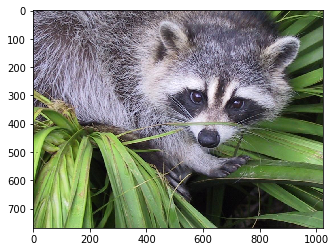

In [20]:
from scipy.misc import face
img_demo = face().astype(np.float32) / 255.

plt.imshow(img_demo);

On va définir la fonction qui renvoie la somme des écarts au carré à 1 pour chaque pixel.
On va ensuite utiliser la différenciation automatique de TensorFlow.

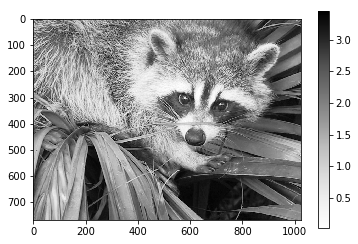

In [21]:
grads = tf.gradients(tf.reduce_sum((1 - img) ** 2), img)
with tf.Session() as sess:
    img_grads, = sess.run(grads, feed_dict={img: img_demo})

plt.imshow(np.sqrt(np.sum(img_grads ** 2, axis=2)), cmap=plt.cm.Greys)
plt.colorbar();

### Question:

   - Retrouver le résultat analytiquement.

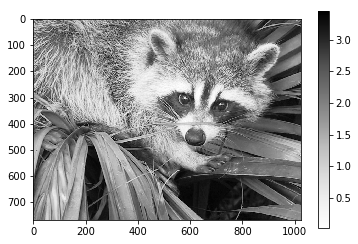

In [22]:
np_img_grads = 2. * (img_demo - 1.)
plt.imshow(np.sqrt(np.sum(np_img_grads ** 2, axis=2)), cmap=plt.cm.Greys)
plt.colorbar();

## MLP avec TensorFlow

Nous allons maitenant construire une MLP "à la main" avec TensorFlow.
Nous verrons après comment faire ça beaucoup plus simplement avec Keras.

In [23]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X, y = datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)
# X, y = datasets.make_moons(n_samples=1000, random_state=42)  # try with 2 moons
X = MinMaxScaler().fit_transform(X)

Y = to_categorical(y)  # pour travailler avec la cross-entropie
Y[:10]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

On découpe les données en apprentissage et test:

In [24]:
X_train, X_test, Y_train, Y_test, y_train, y_test = \
    train_test_split(X, Y, y, test_size=0.15, random_state=42)

Définissons quelques functions auxiliaires

In [25]:
def init_weights(shape, stddev=0.1):
    """Weight initialization """
    weights = tf.random_normal(shape, stddev=stddev)
    return tf.Variable(weights)

def forward_prop(X, w_1, w_2):
    """Forward-propagation."""
    h = tf.nn.sigmoid(tf.matmul(X, w_1))
    Y_pred = tf.matmul(h, w_2)
    return Y_pred

def accuracy(Y_pred, y):
    return np.mean(np.argmax(Y_pred, axis=1) == y)

On va maintenir définir notre réseau de neurones et "apprendre" c'est-à-dire estimer le réseau.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

....................................................................................................

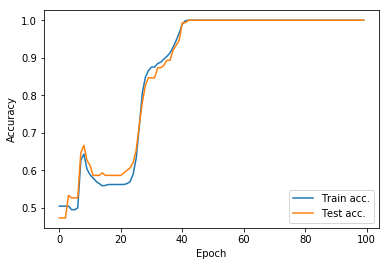

In [26]:
# On fixe la graine du générateur aléatoire pour avoir des résultats reproductibles
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

# Layer's sizes
n_features = X.shape[1]  # Number of input features
n_hidden = 50  # Number of hidden nodes
n_classes = Y.shape[1]  # Number of outcomes

# Placeholders for input and true output
X_input = tf.placeholder("float", shape=[None, n_features])
Y_output = tf.placeholder("float", shape=[None, n_classes])

# Weight initializations
stddev = 0.1
w_1 = init_weights((n_features, n_hidden), stddev)
w_2 = init_weights((n_hidden, n_classes), stddev)

# Forward propagation
Y_pred = forward_prop(X_input, w_1, w_2)
y_pred = tf.argmax(Y_pred, axis=1)

# Compute loss
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y_output,
                                            logits=Y_pred))

updates = tf.train.GradientDescentOptimizer(0.9).minimize(loss)
# updates = tf.train.AdamOptimizer(1e-4).minimize(loss)

# Run SGD
n_epochs = 100
train_accuracy = []
test_accuracy = []
batch_size = 10
n_batches = int(np.ceil(X_train.shape[0] / float(batch_size)))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_idx in range(n_batches):
            start = batch_idx * batch_size
            stop = start + batch_size
            sess.run(updates, feed_dict={X_input: X_train[start: stop],
                                         Y_output: Y_train[start: stop]})

        train_accuracy.append(
            accuracy(sess.run(Y_pred, feed_dict={X_input: X_train}), y_train))
        test_accuracy.append(
            accuracy(sess.run(Y_pred, feed_dict={X_input: X_test}), y_test))

        # print("Epoch = %d, train accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy[-1]))
        print(".", end='')

    sess.close()

plt.figure()
plt.plot(train_accuracy, label='Train acc.')
plt.plot(test_accuracy, label='Test acc.')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Questions

  - Le résultat est-il acceptable? Comment pourrait-on améliorer la performance?

# 3 - MLP avec Keras

Keras est une librairie open-source qui permet de définir de façon très simple des architectures de réseaux de neurones.

Keras utilise TensorFlow (ou Theano) comme moteur d'exécution.

In [27]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

n_hidden = 2
np.random.seed(0)  # to make results reproducible
model = Sequential()
model.add(Dense(n_hidden, input_dim=n_features))
model.add(Activation("sigmoid"))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=300, batch_size=32, verbose=False)

/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


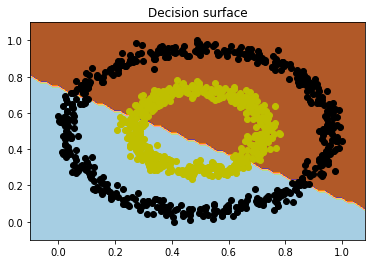

In [28]:
plot_decision_function(clf=model)

In [29]:
model.get_layer(index=1).get_weights()

[array([[ 0.40335584, -1.0032619 ],
        [ 0.36991888, -1.5361453 ]], dtype=float32),
 array([-0.15203257, -0.43321565], dtype=float32)]

Essayons plus large:

/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


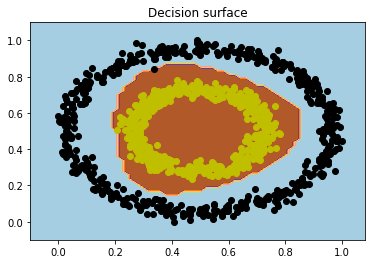

In [31]:
n_hidden = 32
np.random.seed(0)  # to make results reproducible
model = Sequential()
model.add(Dense(n_hidden, input_dim=n_features))
model.add(Activation("sigmoid"))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.3),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=1000, batch_size=32, verbose=False)
plot_decision_function(clf=model)

Essayons plus profond:

/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


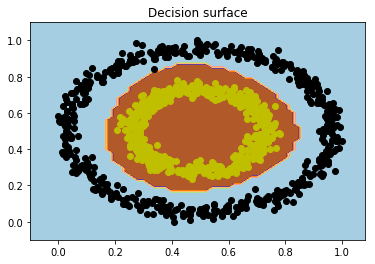

In [32]:
np.random.seed(0)  # to make results reproducible
model = Sequential()
model.add(Dense(3, input_dim=n_features))
model.add(Activation("tanh"))
model.add(Dense(2))
model.add(Activation("tanh"))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

#model.compile(optimizer=optimizers.Adam(lr=1e-4),
model.compile(optimizer=optimizers.SGD(lr=0.03),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=500, batch_size=32, verbose=False)
plot_decision_function(clf=model)

# 4 - CNN avec Keras sur chiffres manuscrits

## Prise en main d'une base de donnée d'images


Nous passons maintenant à un jeu de données classique en machine learning dans le cadre de la classification de chiffres manuscrits.

## Description du jeu de données:
On charge le jeu de données *digits* disponible dans le package scikit-learn. Ce jeu de données contient des images de chiffres numérisés.

In [48]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

print("Nombre de pixels :      {}".format(X.shape[1]))
print("Nombre d'observations : {}".format(X.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y))))

# Choix d'une observation quelconques de la base
idx_to_test = 15

print("Affichage d'une ligne de la matrice / image:")
print(X[idx_to_test, :])
print("Affichage de la classe / chiffre associé:")
print(y[idx_to_test])

Nombre de pixels :      64
Nombre d'observations : 1797
Nombre de classes :     10
Affichage d'une ligne de la matrice / image:
[  0.   5.  12.  13.  16.  16.   2.   0.   0.  11.  16.  15.   8.   4.   0.
   0.   0.   8.  14.  11.   1.   0.   0.   0.   0.   8.  16.  16.  14.   0.
   0.   0.   0.   1.   6.   6.  16.   0.   0.   0.   0.   0.   0.   5.  16.
   3.   0.   0.   0.   1.   5.  15.  13.   0.   0.   0.   0.   4.  15.  16.
   2.   0.   0.   0.]
Affichage de la classe / chiffre associé:
5


**Questions**:

- Combien de fois le chiffre 1 apparait dans les données?

In [50]:
np.sum(y == 1)

182

## Visualisation des observations:

Les images scannées sont de taille  8 x 8 et comportent donc 64 pixels chacune. Elles sont stockées sous la forme de vecteurs ligne, qu'il faut remettre dans un ordre lisible pour les identifiés. L'affichage graphique est proposé avec les commandes qui suivent.


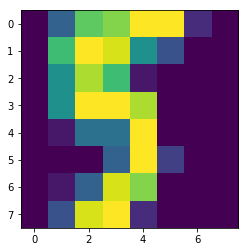

In [51]:
plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)));

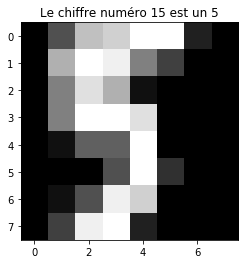

In [52]:
# Amélioration de la visualisation (niveau de gris) et de la légende:
plt.imshow(np.reshape(X[idx_to_test, :], (8, 8)),
           cmap='gray', aspect='equal', interpolation='nearest')

# Attention aux accents: ne pas oublier le u (Unicode) ci-dessous
plt.title(u'Le chiffre numéro %s est un %s' % (idx_to_test, y[idx_to_test]));

In [58]:
img = np.reshape(X[idx_to_test, :], (8, 8))
img[::2, ::2]

array([[ 0.    ,  0.75  ,  1.    ,  0.125 ],
       [ 0.    ,  0.875 ,  0.0625,  0.    ],
       [ 0.    ,  0.375 ,  1.    ,  0.    ],
       [ 0.    ,  0.3125,  0.8125,  0.    ]])

## Apprenons un MLP sur ce dataset

Commençons par la définition du modèle avec Keras

In [53]:
Y = to_categorical(y)

# Center each feature and scale the variance to be unitary
X = MinMaxScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test, y_train, y_test = \
    train_test_split(X, Y, y, test_size=0.2, random_state=42)

# Use fully connected MLP with 1 hidden layer
model = Sequential()
model.add(Dense(output_dim=256, input_dim=X.shape[1], init="glorot_uniform"))
model.add(Activation("relu"))
model.add(Dense(output_dim=10, init="glorot_uniform"))
model.add(Activation("sigmoid"))
model.compile(optimizer=optimizers.Adam(lr=1e-4),
              loss='categorical_crossentropy', metrics=['accuracy'])

Nous pouvons maintenat apprendre. Nous allons utiliser la notion de callback pour "monitorer" la performance aux cours des epochs.

In [54]:
def evaluate_test_accuracy(model):
    Y_pred = model.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)
    return np.mean(y_pred == y_test)

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.test_accuracy = []

    def on_epoch_end(self, batch, logs={}):
        self.test_accuracy.append(evaluate_test_accuracy(model))

callback = LossHistory()

model.fit(X_train, Y_train, nb_epoch=50, batch_size=32,
          callbacks=[callback], verbose=False)
print("Classification accuracy : %s" % evaluate_test_accuracy(model))

Classification accuracy : 0.955555555556


Visualisons les performances au cours de l'apprentissage:

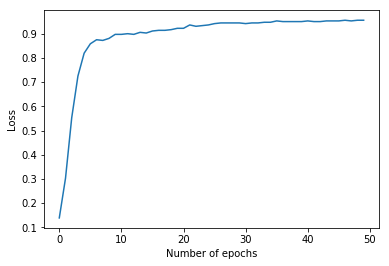

In [56]:
plt.figure()
plt.plot(callback.test_accuracy)
plt.ylabel('Loss')
plt.xlabel('Number of epochs')

### Nous allons maintenant utiliser un réseau dit **convolutionnel**.

Pour cela nous allons utiliser la base MNIST car la base digits est vraiment trop basse résolution.

Toutefois pour avoir des calculs pas trop lourds en l'absence de GPU nous allons travailler avec une sous-partie de la base de données.

In [59]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [60]:
# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Reshape to proper images with 1 color
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

input_shape = (img_rows, img_cols, 1)

batch_size = 32
nb_classes = 10
nb_epoch = 10

model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

n_train_samples = 10000
model.fit(X_train[:n_train_samples], Y_train[:n_train_samples],
          batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=False)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 22s - loss: 1.2841 - acc: 0.5955 - val_loss: 0.4613 - val_acc: 0.8823
Epoch 2/10
10000/10000 [==============================] - 21s - loss: 0.5877 - acc: 0.8240 - val_loss: 0.3208 - val_acc: 0.9090
Epoch 3/10
10000/10000 [==============================] - 21s - loss: 0.4854 - acc: 0.8542 - val_loss: 0.2733 - val_acc: 0.9217
Epoch 4/10
10000/10000 [==============================] - 21s - loss: 0.4095 - acc: 0.8787 - val_loss: 0.2275 - val_acc: 0.9319
Epoch 5/10
10000/10000 [==============================] - 22s - loss: 0.3604 - acc: 0.8950 - val_loss: 0.2038 - val_acc: 0.9410
Epoch 6/10
10000/10000 [==============================] - 21s - loss: 0.3205 - acc: 0.9031 - val_loss: 0.1780 - val_acc: 0.9474
Epoch 7/10
10000/10000 [==============================] - 21s - loss: 0.2927 - acc: 0.9157 - val_loss: 0.1601 - val_acc: 0.9528
Epoch 8/10
10000/10000 [==============================

#### Remarques:

- Un système état de l'art en image utilise environ 50 couches de convolutions et s'entraine sur une base de 1 000 000 d'images avec 1000 classes pendant plusieurs jours de calcul avec un bon GPU.

- Pour le speech recognition, l'état de l'art c'est 8 à 16 couches de CNN 1d et LSTM (réseaux recurrents)

#### Pour aller plus loin:

  - http://www.tensorflow.org
  - http://www.keras.io
  - http://www.deeplearningbook.org/